#Deep Learning Assignment 5
### By Sravanth Chowdary Potluri CS20B1006

Implement the CNN for classifying the flowers from IRIS Flowers Image dataset.
- Implement a custom CNN using Conv2D layers (the configuration of the model can be followed from the tutorial or can be changed as well)
- Implement the Transfer Learning Method for VGG16.


In [1]:
! unzip /content/IRIS.zip

Archive:  /content/IRIS.zip
  inflating: iris-setosa/iris-01ab65973fd487a6cee4c5af1551c42b264eec5abab46bffd7c307ffef647e11.jpg  
  inflating: iris-setosa/iris-0797945218a97d6e5251b4758a2ba1b418cbd52ce4ef46a3239e4b939bd9807b.jpg  
  inflating: iris-setosa/iris-0c826b6f4648edf507e0cafdab53712bb6fd1f04dab453cee8db774a728dd640.jpg  
  inflating: iris-setosa/iris-0ff5ba898a0ec179a25ca217af45374fdd06d606bb85fc29294291facad1776a.jpg  
  inflating: iris-setosa/iris-1289c57b571e8e98e4feb3e18a890130adc145b971b7e208a6ce5bad945b4a5a.jpg  
  inflating: iris-setosa/iris-16f7515e1d6aa6d7dd3af4bca38c8065bfab9d426c5fd75b3c4bc51d737fb9d0.jpg  
  inflating: iris-setosa/iris-1e80d2d6f3e9cf96c1cb33f3e47f3e5a3f4a6eb26fa3ab479d462e1ac837ba66.jpg  
  inflating: iris-setosa/iris-1f941001f508ff1bd492457a90da64e52c461bfd64587a3cf7c6bf1bcb35adab.jpg  
  inflating: iris-setosa/iris-20f5f654ae5fbcc405b465ce257c187f81eb5fc070531f940be42f1424c3fb44.jpg  
  inflating: iris-setosa/iris-21b2ccc2a23b9f878abd0817939fe4b19

In [2]:
!mkdir /content/IRIS

In [3]:
!mv /content/iris-setosa /content/IRIS

In [5]:
!mv /content/iris-versicolour /content/IRIS

In [4]:
!mv /content/iris-virginica /content/IRIS

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters (same as before)
img_height = 256
img_width = 256
batch_size = 5
data_dir = '/content/IRIS'
test_split = 0.2  # Percentage of data to use for testing

# ImageDataGenerator with train/test split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=test_split  # Key parameter for the split
)

# Load and split data
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specifies the training set
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specifies the validation set
)


Found 338 images belonging to 3 classes.
Found 83 images belonging to 3 classes.


In [7]:
print(train_data.class_indices)

{'iris-setosa': 0, 'iris-versicolour': 1, 'iris-virginica': 2}


In [8]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [9]:
num_samples = {}
for cls, idx in train_data.class_indices.items():
  num_samples[cls] = len(train_data.classes[train_data.classes == idx])

print(num_samples)


{'iris-setosa': 54, 'iris-versicolour': 216, 'iris-virginica': 68}


In [10]:
val_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [11]:
num_samples = {}
for cls, idx in val_data.class_indices.items():
  num_samples[cls] = len(val_data.classes[val_data.classes == idx])

print(num_samples)

{'iris-setosa': 13, 'iris-versicolour': 53, 'iris-virginica': 17}


In [12]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.utils import to_categorical
from keras.applications import VGG16
import os

In [18]:
from tensorflow.keras.regularizers import l2
model = tf.keras.models.Sequential([
    InputLayer(input_shape=(256, 256, 3)),
    Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    BatchNormalization(),
    Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    BatchNormalization(),
    Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='valid'),
    BatchNormalization(),
    Flatten(),
    Dense(units=100, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(units=3, activation='softmax')
])

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 25)      1900      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 25)      0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 128, 128, 25)      100       
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 50)        31300     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 50)        0         
 g2D)                                                            
                                                      

In [21]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=10,  # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore best weights after stopping
)


In [22]:
# Train the model and store training history
history = model.fit(train_data, epochs=50, validation_data=val_data,callbacks=[early_stopping])


Epoch 1/50
68/68 [==============================] - 12s 119ms/step - loss: 1.5135 - accuracy: 0.4024 - val_loss: 1.0776 - val_accuracy: 0.4578
Epoch 2/50
68/68 [==============================] - 7s 100ms/step - loss: 1.2116 - accuracy: 0.4408 - val_loss: 1.3405 - val_accuracy: 0.2530
Epoch 3/50
68/68 [==============================] - 6s 91ms/step - loss: 1.0611 - accuracy: 0.5621 - val_loss: 1.0759 - val_accuracy: 0.6145
Epoch 4/50
68/68 [==============================] - 10s 146ms/step - loss: 1.0988 - accuracy: 0.5325 - val_loss: 1.0025 - val_accuracy: 0.6024
Epoch 5/50
68/68 [==============================] - 7s 105ms/step - loss: 1.0441 - accuracy: 0.5592 - val_loss: 1.0116 - val_accuracy: 0.6024
Epoch 6/50
68/68 [==============================] - 8s 118ms/step - loss: 1.0716 - accuracy: 0.5503 - val_loss: 1.6913 - val_accuracy: 0.3494
Epoch 7/50
68/68 [==============================] - 7s 95ms/step - loss: 0.9445 - accuracy: 0.6331 - val_loss: 1.3047 - val_accuracy: 0.4458
Epoch 

In [23]:
# Extract History Data
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

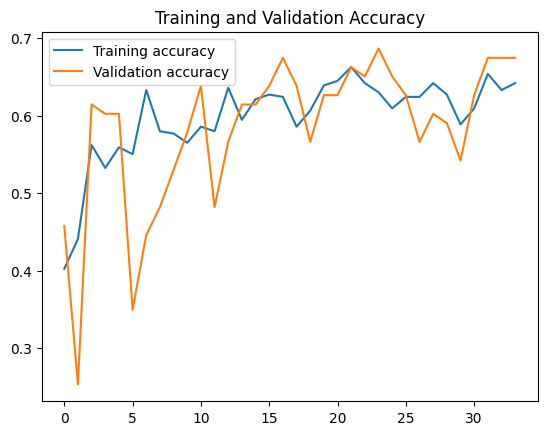

In [24]:
# Plot Training and Validation Accuracy
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

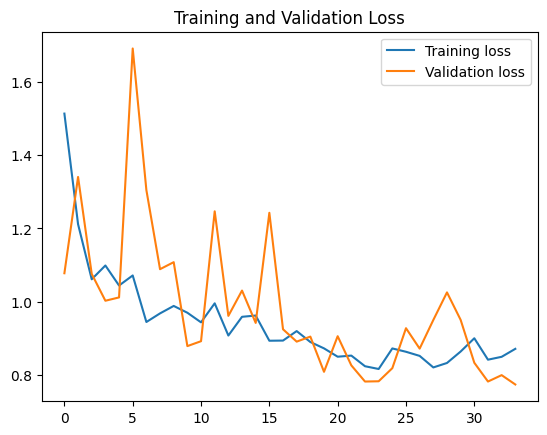

In [25]:
# Plot Training and Validation Loss
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Now Using VGG 16 For Classification

In [27]:
from tensorflow.keras.applications import VGG16

# VGG16 Pretrained Model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [28]:
for layer in vgg16_model.layers:
  layer.trainable = False

In [29]:
model = tf.keras.models.Sequential([
    vgg16_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [30]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               16777728  
                                                                 
 batch_normalization_8 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 1539      
                                                      

In [32]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=10,  # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore best weights after stopping
)


In [33]:
# Train the model and store training history
history = model.fit(train_data, epochs=50, validation_data=val_data,batch_size=1,callbacks=[early_stopping])


Epoch 1/50
68/68 [==============================] - 13s 138ms/step - loss: 1.8945 - accuracy: 0.4231 - val_loss: 3.0975 - val_accuracy: 0.3253
Epoch 2/50
68/68 [==============================] - 8s 119ms/step - loss: 1.2170 - accuracy: 0.5562 - val_loss: 1.9281 - val_accuracy: 0.5542
Epoch 3/50
68/68 [==============================] - 8s 118ms/step - loss: 1.0377 - accuracy: 0.5799 - val_loss: 1.3305 - val_accuracy: 0.6506
Epoch 4/50
68/68 [==============================] - 7s 104ms/step - loss: 1.0225 - accuracy: 0.6006 - val_loss: 1.1588 - val_accuracy: 0.5904
Epoch 5/50
68/68 [==============================] - 7s 105ms/step - loss: 0.8276 - accuracy: 0.6391 - val_loss: 2.3069 - val_accuracy: 0.2892
Epoch 6/50
68/68 [==============================] - 8s 118ms/step - loss: 0.9267 - accuracy: 0.6183 - val_loss: 1.1388 - val_accuracy: 0.6867
Epoch 7/50
68/68 [==============================] - 8s 115ms/step - loss: 0.8574 - accuracy: 0.6361 - val_loss: 1.1588 - val_accuracy: 0.5181
Epoch

In [34]:
# Extract History Data
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

In [35]:
import matplotlib.pyplot as plt

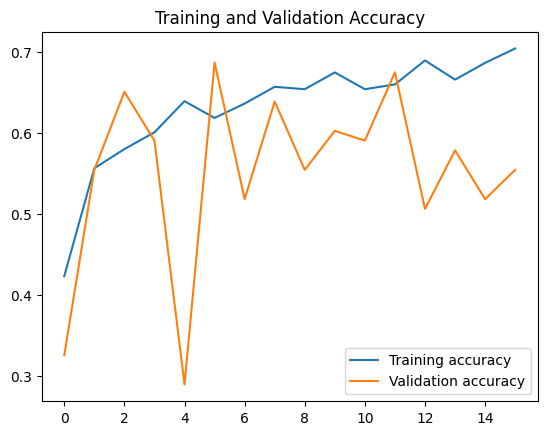

In [36]:
# Plot Training and Validation Accuracy
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

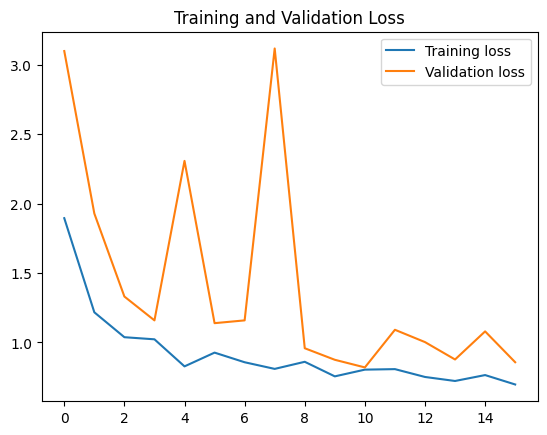

In [37]:
# Plot Training and Validation Loss
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()